# Notes for scraping from "List" view

###### The following section covers sold houses in "List" view:

In [3]:
from __future__ import print_function, division
import requests
import pandas as pd
from bs4 import BeautifulSoup

# url = 'https://www.mlslistings.com/Search/Result/a63f01ea-14c0-4d2c-811a-8e460beed5fb/1?view=list' # Past 3 months - Sold
# url = 'https://www.mlslistings.com/Search/Result/8a2346ca-1207-4fe4-b755-35a104e01a3d/1?view=list' # Past 3 years - Sold (includes all types of property)
# url = 'https://www.mlslistings.com/Search/Result/d91d5243-c98f-4ce2-9f90-4b362b047ff1/1?view=list' # Past 3 years - Sold 
url = 'https://www.mlslistings.com/Search/Result/a28f818b-9497-4094-99b5-8b577f79e62b/3?view=list' # Listed for sale
response = requests.get(url)
response.status_code

200

In [5]:
# print(response.text)

In [5]:
page = response.text
soup = BeautifulSoup(page,"lxml")

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no, minimal-ui" name="viewport"/>
  <title>
   san francisco Recently Sold Real Estate &amp; Homes | MLSListings
  </title>
  <meta content="1 DAYS" name="revist-after"/>
  <meta content="GENERAL" name="rating"/>
  <meta content="DOCUMENT" name="resource-type"/>
  <meta content="https://www.mlslistings.com" name="home_url"/>
  <meta content="Business: Real Estate" name="classification"/>
  <meta content="Business: Real Estate" name="category"/>
  <meta content="Search the most up to date collection of homes, condos, land and more on mlslistings.com." name="abstract"/>
  <meta content="Search the most up to date collection of homes, condos, land and more on mlslistings.com." name="description"/>
  <meta content="Copyright (c) 2006-2018 MLSListings, Inc." name="copyright"/>
  <meta content="MLSListings, Inc." name="author"/>
  <meta content="INDEX, FOLLOW, NOYDIR" 
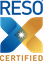

In [9]:
print(soup.prettify())

In [92]:
# # Address

# print(soup.find_all('a'))
# print(soup.a)
# print(soup.a.prettify())
# for link in soup.find_all('a'): 
#     print(link)
# print(soup.find(class_='search-nav-link').find_all('td'))
# soup.find_all('a')
# ['class']
# for element in soup.find_all(class_='search-nav-link'):
#    print(element, '\n')
soup.find_all(class_='search-nav-link')[5]['title']

'618 47th Ave, San Francisco, CA 94121'

In [63]:
# soup.find_all(class_='search-nav-link')[1][title]

# %%timeit

# titles = []
# for i in range(1,63,2):
#     try:
#         listing_title = soup.find_all(class_='search-nav-link')[i].text
#         titles.append(listing_title)
#     except:
#         break

# # if soup.find_all(class_='search-nav-link')[i]['title'] is not None:
# #         print(listing_title)
# # return titles

titles = []
for j in range(1,81,2):
    try:
        listing_title = soup.find_all(class_='search-nav-link')[j]['title']
        titles.append(listing_title)
    except:
        break

In [142]:
pd.DataFrame(titles).shape[0]

31

In [37]:
# # Listing Price

# for element in soup.find_all(class_='search-nav-link'):
#    print(element, '\n')
soup.find_all(class_='font-weight-bold listing-price d-block pull-left pr-25')
# listing_price = soup.find_all(class_='font-weight-bold listing-price d-block pull-left pr-25')
# listing_price = "{0:.2f}".format(round(float(listing_price.replace('$','').replace(',','')),2))
# print(listing_price)

[<span class="font-weight-bold listing-price d-block pull-left pr-25">$1,500,000</span>,
 <span class="font-weight-bold listing-price d-block pull-left pr-25">$1,352,000</span>,
 <span class="font-weight-bold listing-price d-block pull-left pr-25">$1,711,400</span>,
 <span class="font-weight-bold listing-price d-block pull-left pr-25">$2,200,000</span>,
 <span class="font-weight-bold listing-price d-block pull-left pr-25">$1,300,000</span>,
 <span class="font-weight-bold listing-price d-block pull-left pr-25">$1,800,000</span>,
 <span class="font-weight-bold listing-price d-block pull-left pr-25">$889,000</span>,
 <span class="font-weight-bold listing-price d-block pull-left pr-25">$910,000</span>,
 <span class="font-weight-bold listing-price d-block pull-left pr-25">$1,200,000</span>,
 <span class="font-weight-bold listing-price d-block pull-left pr-25">$1,550,000</span>,
 <span class="font-weight-bold listing-price d-block pull-left pr-25">$1,055,000</span>,
 <span class="font-weight

In [10]:
# # MLS Number: info-item-label
soup.find_all(class_='info-item-label d-block pull-left font-weight-bold')[30].text

'ML81713151'

In [41]:
# # Number of Bedrooms

# soup.find_all(class_='listing-info-item font-size-sm line-height-base d-block pull-left pr-50 listing-beds')[0].find_all(class_='font-weight-bold info-item-value d-block pull-left pr-25')[0].text
bednum = []
for m in range(0,40):
    try:
        num_beds = soup.find_all(class_='listing-info-item font-size-sm line-height-base d-block pull-left pr-50 listing-beds')[m].find_all(class_='font-weight-bold info-item-value d-block pull-left pr-25')[0].text
        try:
            num_beds = int(num_beds)
        except:
            num_beds = 0
        bednum.append(num_beds)
    except:
        break

# len(bednum)
pd.DataFrame(bednum).shape[0]
# bednum

31

In [80]:
# # Number of Bathrooms

batnum = []

for k in range(0,40):
    try:
        num_baths = soup.find_all(class_='listing-info-item font-size-sm line-height-base d-block pull-left pr-50 listing-baths')[k].find_all(class_='font-weight-bold info-item-value d-block pull-left pr-25')[0].text
#         try:
#             num_baths = int(num_baths)
#         except:
#             num_baths = int(0)                    
        batnum.append(num_baths)
    except:
        break


pd.DataFrame(batnum)
# .shape[0]

0
0   2/1
1     2
2   2/1
3   5/1
4   2/1
5     2
6     1
7     1
8     1
9     3
10    1
11  1/1
12    3
13    2
14    2
15    2
16    1
17    2
18    2
19    2
20    2
21    2
22    2
23    1
24  1/1
25    1
26    2
27  1/2
28    2
29    3
30    2

In [46]:
# # Listing Status

status = []

for k in range(0,40):
    try:
        listing_status = soup.find_all(class_='listing-statusd-block pull-left pl-50 pr-1 status-marker status-closed')[k].text
        status.append(listing_status)
    except:
        break
        
# status
pd.DataFrame(status).shape[0]

31

In [66]:
# # Square Footage

sqfoot = []

for j in range(0,80,2):
    try:
        sq_footage = soup.find_all(class_='listing-info-item font-size-sm line-height-base d-block pull-left pr-50 listing-sqft last')[j].find_all(class_='font-weight-bold info-item-value d-block pull-left pr-25')[0].text
        sqfoot.append(sq_footage)
    except:
        break

# sqfoot
pd.DataFrame(sqfoot).shape[0]

31

In [68]:
# # Square Footage

buildt = []

for j in range(1,81,2):
    try:
        year_built = soup.find_all(class_='listing-info-item font-size-sm line-height-base d-block pull-left pr-50 listing-sqft last')[j].find_all(class_='font-weight-bold info-item-value d-block pull-left pr-25')[0].text
        buildt.append(year_built)
    except:
        break

# buildt
pd.DataFrame(buildt).shape[0]

31

In [84]:
pagenum=30
for i in range(1,pagenum+1):
    url = 'https://www.mlslistings.com/Search/Result/d91d5243-c98f-4ce2-9f90-4b362b047ff1/{0}?view=list'.format(i)
    print(url)

https://www.mlslistings.com/Search/Result/d91d5243-c98f-4ce2-9f90-4b362b047ff1/1?view=list
https://www.mlslistings.com/Search/Result/d91d5243-c98f-4ce2-9f90-4b362b047ff1/2?view=list
https://www.mlslistings.com/Search/Result/d91d5243-c98f-4ce2-9f90-4b362b047ff1/3?view=list
https://www.mlslistings.com/Search/Result/d91d5243-c98f-4ce2-9f90-4b362b047ff1/4?view=list
https://www.mlslistings.com/Search/Result/d91d5243-c98f-4ce2-9f90-4b362b047ff1/5?view=list
https://www.mlslistings.com/Search/Result/d91d5243-c98f-4ce2-9f90-4b362b047ff1/6?view=list
https://www.mlslistings.com/Search/Result/d91d5243-c98f-4ce2-9f90-4b362b047ff1/7?view=list
https://www.mlslistings.com/Search/Result/d91d5243-c98f-4ce2-9f90-4b362b047ff1/8?view=list
https://www.mlslistings.com/Search/Result/d91d5243-c98f-4ce2-9f90-4b362b047ff1/9?view=list
https://www.mlslistings.com/Search/Result/d91d5243-c98f-4ce2-9f90-4b362b047ff1/10?view=list
https://www.mlslistings.com/Search/Result/d91d5243-c98f-4ce2-9f90-4b362b047ff1/11?view=li

In [76]:
# # Broker

broker = []

for k in range(0,40):
    try:
        listing_broker = soup.find_all(class_='listing-info clearfix font-size-sm line-height-base mb-25 listing-broker')[k].find_all(class_='font-weight-bold d-block pull-left')[0].text
        broker.append(listing_broker)
    except:
        break
# soup.find_all(class_='listing-info clearfix font-size-sm line-height-base mb-25 listing-broker')[1].find_all(class_='font-weight-bold d-block pull-left')[0].text

pd.DataFrame(broker).shape[0]

31

###### The following section covers houses on current listings ("List" view):

In [9]:
soup.find_all(class_='listing-dom-block pull-left pl-25 ')[0].text

'60 Days on Site'

###### The following section covers houses for sale - individual page:

In [1]:
from __future__ import print_function, division
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = 'https://www.mlslistings.com/property/mr40841647/4099-barnsley-pl-dublin-ca-94568/9113714' # individual page
response = requests.get(url)
response.status_code
page = response.text
soup = BeautifulSoup(page,"lxml")

In [2]:
print(soup.find_all(class_='font-weight-bold h font-size-xl line-height-lg')[0].text.strip())
print(soup.find_all('h4')[0].text.split(' ')[0].strip())
print(soup.find_all(class_='font-size-base sm-sticky')[0].text.strip())
print(soup.find('thead').find_all(class_='text-xs-center')[0].text.strip())
print(soup.find('thead').find_all(class_='text-xs-center')[1].text.strip())
print(soup.find('thead').find_all(class_='text-xs-center')[2].text.strip())
print(soup.find('thead').find_all(class_='text-xs-center')[3].text.strip())
print(soup.find('thead').find_all(class_='text-xs-center')[4].text.strip())
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[2].text.strip()) # Days on site
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[0].text.strip())
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[4].text.strip()) # Bathroom
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[5].text.strip()) # Kitchen
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[6].text.strip()) # Dining Room
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[8].text.strip()) # Fireplace
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[9].text.strip()) # Flooring
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[10].text.strip()) # Laundry
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[11].text.strip()) # Cooliing
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[12].text.strip()) # Heating
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[13].text.strip()) # Roof
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[15].text.strip()) # Pool
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[16].text.strip()) # Style
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[18].text.strip()) # Garage
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[19].text.strip()) # Elementary District
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[20].text.strip()) # High School District
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[22].text.strip()) # Sewer
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[23].text.strip()) # Water
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[24].text.strip()) # HOA Fee
print(soup.find_all(class_='card-text font-size-midr line-height-xl')[25].text.strip()) # Complex Amenities
print(soup.find_all(class_='mb-2')[0].find_all('p')[2].text.strip()) # Listing Agency

4099 Barnsley Pl, Dublin, CA 94568
$1,100,000
Single Family Residence
4
3/1
2,179
3,909
2003
1
MR40841647
Tile
Dishwasher, Garbage Disposal,  Microwave,  Other, Oven Range - Gas, Countertop - Tile,  Island, Kitchen/Family Room Combo
Dining Area
Family Room
Hardwood
In Laundry Room,  Other
Ceiling Fan, Central -1 Zone
Forced Air
Tile
None, Pool - No
Traditional
Attached Garage,  Garage, Gate/Door Opener, Parking Area, Garage: 2 Car(s)
Dublin Unified
Dublin Unified
Public Sewer
Public
$200
Other
Crown Key Realty, Inc.


###### The following section covers sold houses - individual page:

In [3]:
from __future__ import print_function, division
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = 'https://www.mlslistings.com/property/ml81722387/3060-26th-ave-san-francisco-ca-94132/9073994' # individual page
response = requests.get(url)
response.status_code
page = response.text
soup = BeautifulSoup(page,"lxml")

In [16]:
print(soup.find_all(class_='font-weight-bold h font-size-xl line-height-lg')[0].text.strip())
print(soup.find_all('h4')[0].text.split(' ')[0].strip())
print(soup.find_all(class_='font-size-base sm-sticky')[0].text.strip())
# soup.find_all(class_='font-size-base sm-sticky')
print(soup.find_all(class_='ml-50 status-marker status-closed')[0].text.replace('Sold on ','').strip())

3060 26th Ave, San Francisco, CA 94132
$2,600,000
Single Family Residence
Oct 5, 2018
